In [43]:
import itertools
from framework.utils import Location
from config import *
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def generate_config1(name='config1'):
    gateway_location = [Location(0, 0)]

    X_position = list(range(-CORD + 1, CORD + 1, 7))
    Y_position = list(range(-CORD + 1, CORD + 1, 7))
    connection = {}
    N = len(X_position)
    node_locations = []
    for i in range(N):
        node_locations.append([None] * N)

    for m, i in enumerate(Y_position):
        for n, j in enumerate(X_position):
            x = j * GRID
            y = i * GRID
            l = Location(x, y)
            node_locations[m][n] = l
            connection[l] = []
            if n > 0:
                connection[l].append(node_locations[m][n - 1])
            if m > 0:
                connection[l].append( node_locations[m - 1][n])
    for i, l in enumerate(node_locations[0]):
        connection[l].append(node_locations[N - 1][i])
        connection[node_locations[i][0]].append( node_locations[i][N-1])

    node_locations = list(itertools.chain.from_iterable(node_locations))
    with open('./config/'+ name +'.pickle', 'wb') as f:
        pickle.dump([gateway_location, node_locations, connection, MAX_DISTANCE], f)

def generate_config2(name='config2'):
    gateway_location = [Location(0, 0)]

    X_position = list(range(-CORD + 1, CORD + 1, 5))
    Y_position = list(range(-CORD + 1, CORD + 1, 5))
    connection = {}
    N = len(X_position)
    node_locations = []
    for i in range(N):
        node_locations.append([None] * N)

    for m, i in enumerate(Y_position):
        for n, j in enumerate(X_position):
            x = j * GRID
            y = i * GRID
            l = Location(x, y)
            node_locations[m][n] = l
            connection[l] = []
            if n > 0:
                connection[l].append(node_locations[m][n - 1])
            if m > 0:
                connection[l].append( node_locations[m - 1][n])
    for i, l in enumerate(node_locations[0]):
        connection[l].append(node_locations[N - 1][i])
        connection[node_locations[i][0]].append( node_locations[i][N-1])

    node_locations = list(itertools.chain.from_iterable(node_locations))
    with open('./config/'+ name +'.pickle', 'wb') as f:
        pickle.dump([gateway_location, node_locations, connection, MAX_DISTANCE], f)
        
def generate_config3(name='config3'):
    gateway_location = [Location(0, 0)]

    X_position = list(range(-CORD + 5, CORD + 1, 10))
    Y_position = list(range(-CORD + 5, CORD + 1, 10))
    connection = {}
    N = len(X_position)
    node_locations = []
    for i in range(N):
        node_locations.append([None] * N)

    for m, i in enumerate(Y_position):
        for n, j in enumerate(X_position):
            x = j * GRID
            y = i * GRID
            l = Location(x, y)
            node_locations[m][n] = l
            connection[l] = []
            if n > 0:
                connection[l].append(node_locations[m][n - 1])
            if m > 0:
                connection[l].append( node_locations[m - 1][n])
    for i, l in enumerate(node_locations[0]):
        connection[l].append(node_locations[N - 1][i])
        connection[node_locations[i][0]].append( node_locations[i][N-1])

    node_locations = list(itertools.chain.from_iterable(node_locations))
    with open('./config/'+ name +'.pickle', 'wb') as f:
        pickle.dump([gateway_location, node_locations, connection, MAX_DISTANCE], f)
        
        
def generate_config4(name='config4'):
    gateway_location = [Location(0, 0)]

    X_position = list(range(-25, 26, 10))
    Y_position = list(range(-25, 26, 10))
    connection = {}
    N = len(X_position)
    node_locations = []
    for i in range(N):
        node_locations.append([None] * N)

    for m, i in enumerate(Y_position):
        for n, j in enumerate(X_position):
            x = j * GRID
            y = i * GRID
            l = Location(x, y)
            node_locations[m][n] = l
            connection[l] = []
            if n > 0:
                connection[l].append(node_locations[m][n - 1])
            if m > 0:
                connection[l].append( node_locations[m - 1][n])
    for i, l in enumerate(node_locations[0]):
        connection[l].append(node_locations[N - 1][i])
        connection[node_locations[i][0]].append( node_locations[i][N-1])

    node_locations = list(itertools.chain.from_iterable(node_locations))
    with open('./config/'+ name +'.pickle', 'wb') as f:
        pickle.dump([gateway_location, node_locations, connection, 25 * GRID], f)

def generator_random1(name='random1', seed=3):
    gateway_location = [Location(0, 0)]
    
    np.random.seed(seed)
    X = np.random.randint(-1500, 1500, 50)
    Y = np.random.randint(-1500, 1500, 50)


    nearest_nodes = {}
    node_locations = []
    n_nearest_nodes = 5
    distance_threshold = 150 * 150
    pos = {}
    connection = {}

    for i in range(len(X)):
        node_locations.append(Location(X[i], Y[i]))
        pos[i] = (X[i], Y[i])
        dx = X - X[i]
        dx1 = dx + 5000
        dx2 = dx - 5000
        dy = Y - Y[i]
        dy1 = dy + 5000
        dy2 = dy - 5000
        distance1 = dx * dx + dy * dy
        distance2 = dx1 * dx1 + dy * dy
        distance3 = dx2 * dx2 + dy * dy
        distance4 = dx * dx + dy1 * dy1
        distance5 = dx * dx + dy2 * dy2
        distance = np.min(np.array([distance1, distance2, distance3, distance4, distance5]), axis=0)
        nodes = [n for n in np.argpartition(distance,n_nearest_nodes)[:n_nearest_nodes]]
        nodes = set(nodes)
        nodes.update(list(np.argwhere(distance<distance_threshold).flatten()))
        nodes.remove(i)
        nearest_nodes[i] = nodes

    

    edges = []
    for i in range(len(X)):
        nodes = nearest_nodes[i].copy()
        for node in nodes:
    #         if i in nearest_nodes[node]:
            if True:
                edges.append((i, node))


    G = nx.Graph()
    G.add_nodes_from(nearest_nodes.keys())
    G.add_edges_from(edges)
    for e in G.edges:
        if node_locations[e[0]] not in connection:
            connection[node_locations[e[0]]] = []
        connection[node_locations[e[0]]].append(node_locations[e[1]])
    nx.draw(G, pos=pos, node_size=100)
    plt.show()
    with open('./config/'+ name +'.pickle', 'wb') as f:
        pickle.dump([gateway_location, node_locations, connection, 1500], f)

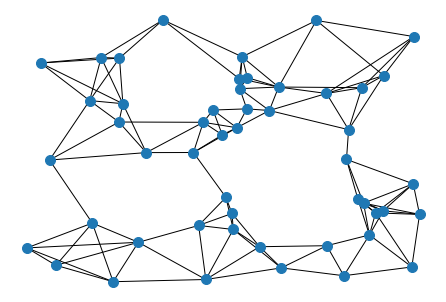

In [44]:
generate_config1()
generate_config2()
generate_config3()
generate_config4()
generator_random1()